In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [2]:
# Enable the cache
ff1.Cache.enable_cache('cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

In [3]:
# Load the session data
quali = ff1.get_session(2022, 'Canada', 'Q')

# Get the laps
laps = quali.load_laps(with_telemetry=True)

C:\Users\Uni\anaconda3\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '55', '44', '20', '47', '31', '63', 

In [4]:
# Select the laps from Perez and Verstappen
laps_ver = laps.pick_driver('VER').pick_wo_box()#.pick_quicklaps(threshold=None)#
laps_per = laps.pick_driver('PER').pick_wo_box()
Qlap_ver_lap = laps_ver.loc[laps_ver['Stint'] == 2].get_telemetry().add_distance()
Qlap_per_lap = laps_per.loc[laps_per['Stint'] == 2].get_telemetry().add_distance()

Qlap_ver_lap['Driver'] = 'VER' 
Qlap_per_lap['Driver'] = 'PER'

#Append Driver Datasets in one 

telemetry = Qlap_ver_lap.append(Qlap_per_lap)

telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2022-06-18 20:27:39.486,0 days 00:42:37.537000,,256.948333,0 days 00:00:00,10691,270,7,100,False,9,pos,0.000036,OnTrack,3361,866,133,0.000000,VER
3,2022-06-18 20:27:39.588,0 days 00:42:37.639000,,256.948333,0 days 00:00:00.102000,10750,272,7,100,False,9,car,0.001834,OnTrack,3376,722,130,7.706667,VER
4,2022-06-18 20:27:39.666,0 days 00:42:37.717000,,256.948333,0 days 00:00:00.180000,10791,273,7,100,False,9,pos,0.003213,OnTrack,3386,626,128,13.621667,VER
5,2022-06-18 20:27:39.908,0 days 00:42:37.959000,77,256.948333,0 days 00:00:00.422000,10832,275,7,100,False,9,car,0.007517,OnTrack,3392,526,127,32.107778,VER
6,2022-06-18 20:27:39.966,0 days 00:42:38.017000,77,251.309444,0 days 00:00:00.480000,10745,275,7,68,False,9,pos,0.008556,OnTrack,3393,504,128,36.538333,VER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,2022-06-18 20:29:30.287,0 days 00:44:28.338000,31,415.028611,0 days 00:01:32.493000,11742,265,6,100,False,9,pos,0.988670,OnTrack,3299,1215,129,4297.570000,PER
705,2022-06-18 20:29:30.468,0 days 00:44:28.519000,31,410.261944,0 days 00:01:32.674000,11782,266,6,100,False,9,car,0.991748,OnTrack,3325,1096,128,4310.943889,PER
706,2022-06-18 20:29:30.668,0 days 00:44:28.719000,31,402.484167,0 days 00:01:32.874000,11764,268,6,100,False,9,car,0.995172,OnTrack,3329,1061,128,4325.832778,PER
707,2022-06-18 20:29:30.726,0 days 00:44:28.777000,31,402.484167,0 days 00:01:32.932000,11379,268,6,100,False,9,pos,0.996168,OnTrack,3334,1036,129,4330.150556,PER


In [5]:

num_minisectors = 80

# Grab the maximum value of distance that is known in the telemetry
total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors


In [6]:
# Initiate minisector variable, with 0 (meters) as a starting point.
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

minisectors

[0,
 54.30834027777779,
 108.61668055555558,
 162.92502083333335,
 217.23336111111115,
 271.54170138888895,
 325.8500416666667,
 380.1583819444445,
 434.4667222222223,
 488.7750625000001,
 543.0834027777779,
 597.3917430555557,
 651.7000833333334,
 706.0084236111112,
 760.316763888889,
 814.6251041666668,
 868.9334444444446,
 923.2417847222224,
 977.5501250000002,
 1031.858465277778,
 1086.1668055555558,
 1140.4751458333335,
 1194.7834861111114,
 1249.091826388889,
 1303.4001666666668,
 1357.7085069444447,
 1412.0168472222224,
 1466.3251875000003,
 1520.633527777778,
 1574.941868055556,
 1629.2502083333336,
 1683.5585486111115,
 1737.8668888888892,
 1792.175229166667,
 1846.4835694444448,
 1900.7919097222225,
 1955.1002500000004,
 2009.408590277778,
 2063.716930555556,
 2118.0252708333337,
 2172.3336111111116,
 2226.641951388889,
 2280.950291666667,
 2335.258631944445,
 2389.566972222223,
 2443.8753125000003,
 2498.183652777778,
 2552.491993055556,
 2606.8003333333336,
 2661.1086736111

In [7]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)


average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

average_speed

,Minisector,Driver,Speed
0,1,PER,273.833333
1,1,VER,273.500000
2,2,PER,249.857143
3,2,VER,247.428571
4,3,PER,185.625000
...,...,...,...
155,78,VER,261.400000
156,79,PER,257.500000
157,79,VER,267.833333
158,80,PER,266.200000


In [8]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

fastest_driver

,Minisector,Fastest_driver
0,1,PER
2,2,PER
5,3,VER
7,4,VER
9,5,VER
...,...,...
153,77,VER
155,78,VER
157,79,VER
158,80,PER


In [9]:
# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'PER', 'Fastest_driver_int'] = 2
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,Fastest_driver,Fastest_driver_int
0,2022-06-18 20:27:39.486,0 days 00:42:37.537000,,256.948333,0 days 00:00:00,10691,270,7,100,False,...,0.000036,OnTrack,3361,866,133,0.000000,VER,1,PER,2.0
6,2022-06-18 20:27:57.794,0 days 00:42:55.845000,,224.345000,0 days 00:00:00,10796,271,6,100,False,...,0.000019,OnTrack,3356,890,129,0.000000,PER,1,PER,2.0
1,2022-06-18 20:27:39.588,0 days 00:42:37.639000,,256.948333,0 days 00:00:00.102000,10750,272,7,100,False,...,0.001834,OnTrack,3376,722,130,7.706667,VER,1,PER,2.0
7,2022-06-18 20:27:57.907,0 days 00:42:55.958000,,224.345000,0 days 00:00:00.113000,10819,272,6,100,False,...,0.001999,OnTrack,3369,806,129,8.537778,PER,1,PER,2.0
8,2022-06-18 20:27:57.948,0 days 00:42:55.999000,,224.345000,0 days 00:00:00.154000,10864,274,7,100,False,...,0.002719,OnTrack,3372,774,128,11.658333,PER,1,PER,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,2022-06-18 20:29:30.287,0 days 00:44:28.338000,31,415.028611,0 days 00:01:32.493000,11742,265,6,100,False,...,0.988670,OnTrack,3299,1215,129,4297.570000,PER,80,PER,2.0
1380,2022-06-18 20:29:30.468,0 days 00:44:28.519000,31,410.261944,0 days 00:01:32.674000,11782,266,6,100,False,...,0.991748,OnTrack,3325,1096,128,4310.943889,PER,80,PER,2.0
1381,2022-06-18 20:29:30.668,0 days 00:44:28.719000,31,402.484167,0 days 00:01:32.874000,11764,268,6,100,False,...,0.995172,OnTrack,3329,1061,128,4325.832778,PER,80,PER,2.0
1382,2022-06-18 20:29:30.726,0 days 00:44:28.777000,31,402.484167,0 days 00:01:32.932000,11379,268,6,100,False,...,0.996168,OnTrack,3334,1036,129,4330.150556,PER,80,PER,2.0


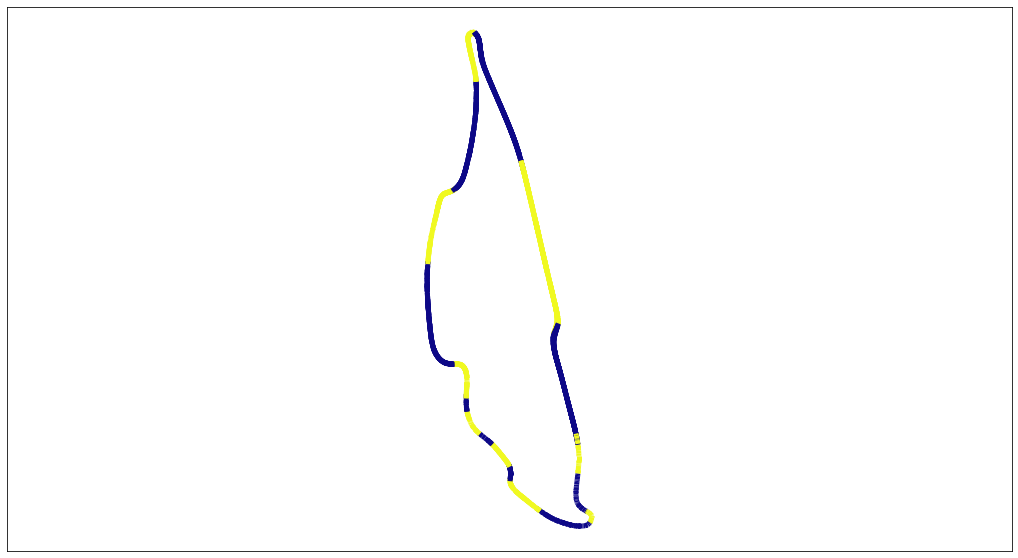

In [10]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('plasma', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

#cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
#cbar.set_ticks(np.arange(1.5, 9.5))
#cbar.set_ticklabels(['VER', 'PER'])

plt.savefig('2021_ver_ham_q.png')

plt.show()

In [11]:
#Time Analysis

average_speed['t'] = ((minisector_length/1000)/average_speed['Speed'])*3600

average_speed['Delta'] = 0

for i in range(0,159,2):
    average_speed.iloc[i,4] = average_speed.iloc[i,3]-average_speed.iloc[i+1,3]
print(average_speed['Delta'].sum())
average_speed


0.7699712296037584


,Minisector,Driver,Speed,t,Delta
0,1,PER,273.833333,0.713975,-0.000870
1,1,VER,273.500000,0.714845,0.000000
2,2,PER,249.857143,0.782487,-0.007680
3,2,VER,247.428571,0.790168,0.000000
4,3,PER,185.625000,1.053253,0.033454
...,...,...,...,...,...
155,78,VER,261.400000,0.747934,0.000000
156,79,PER,257.500000,0.759262,0.029293
157,79,VER,267.833333,0.729969,0.000000
158,80,PER,266.200000,0.734448,0.004933


In [12]:
Perez = average_speed.loc[average_speed['Driver'] == 'PER']
Ver = average_speed.loc[average_speed['Driver'] == 'VER']
print(Perez['t'].sum())
print(Ver['t'].sum())

93.74535271908495
91.51635145216775


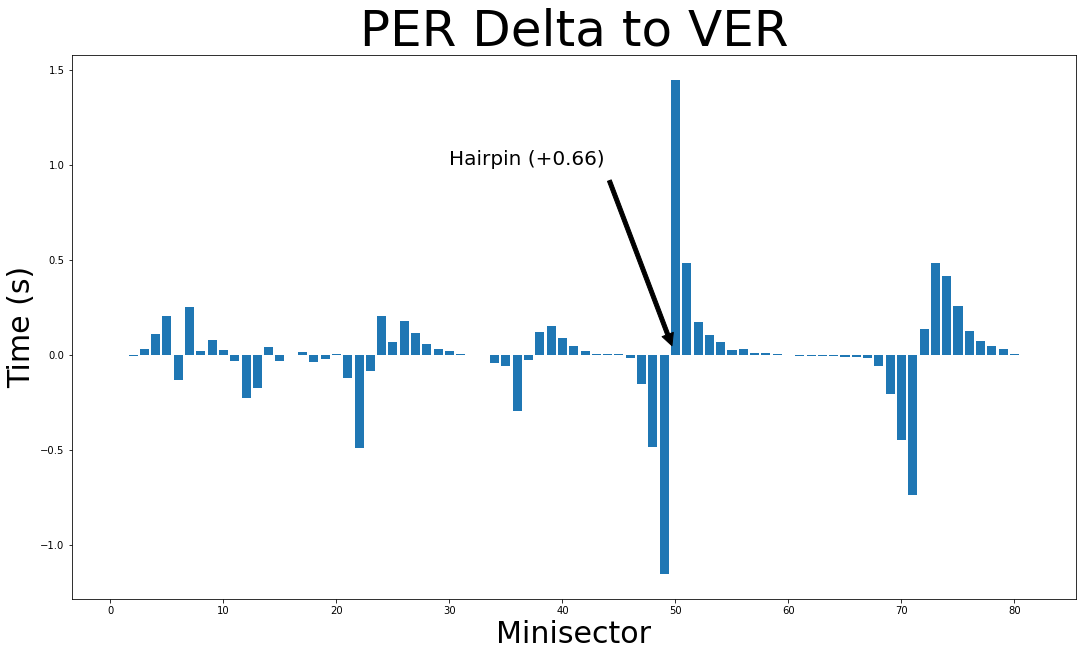

In [16]:
#plt.xticks(range(len(data)), labels)
plt.xlabel('Minisector',fontsize=30)
plt.ylabel('Time (s)',fontsize=30)
plt.title('PER Delta to VER',fontsize=50)
plt.bar(Perez['Minisector'], Perez['Delta']) 
plt.annotate('Hairpin (+0.66)', fontsize=20, xy=(50, 0), xytext=(30, 1),arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig('ver_per_WQ.png')
plt.show()